In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

In [3]:
df = pd.read_csv("D:\EDA Corr\PTDL-IE224\data\interim\handled_missing_values.csv")

<>:1: SyntaxWarning: invalid escape sequence '\E'
<>:1: SyntaxWarning: invalid escape sequence '\E'
C:\Users\admin\AppData\Local\Temp\ipykernel_14840\1804775907.py:1: SyntaxWarning: invalid escape sequence '\E'
  df = pd.read_csv("D:\EDA Corr\PTDL-IE224\data\interim\handled_missing_values.csv")


In [11]:
df.shape

(3000, 27)

In [5]:
#tính toán tương quan cho các cột số
correlation_with_age = df.select_dtypes(include=['number']).corr()['Age'].sort_values(ascending=False)

#chuyển sang mã số cho biến phân loại 
for col in df.select_dtypes(include=['object', 'category']).columns:
    df[col] = pd.Categorical(df[col]).codes
# Sau đó tính tương quan
correlation_with_age = df.corr()['Age'].sort_values(ascending=False)

correlation_with_age


Age                   1.000000
Hearing               0.712374
Systolic_BP           0.646056
Diastolic_BP          0.611071
Cholesterol           0.432368
Blood_Glucose         0.428573
Alcohol               0.032695
Stress                0.029093
Gender                0.021714
Height                0.020322
Education             0.014389
Chronic_Diseases      0.011892
Mental_Health         0.011106
Sun_Exposure          0.009245
Sleep                 0.007218
Diet                  0.005510
Weight                0.002521
Medication           -0.000041
Physical_Activity    -0.000136
BMI                  -0.008042
Pollution            -0.010464
Family_History       -0.019260
Income               -0.020475
Smoking              -0.176622
Cognitive_Function   -0.508058
Vision               -0.899692
Bone_Density         -0.937712
Name: Age, dtype: float64

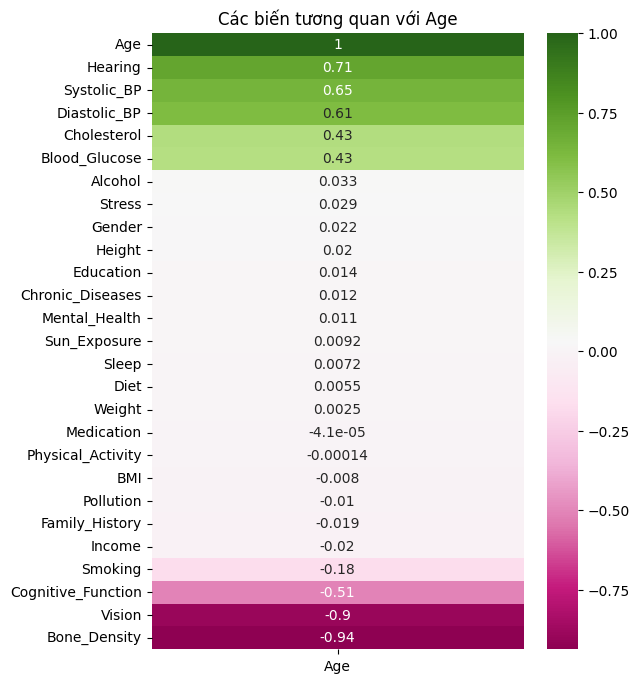

In [6]:
plt.figure(figsize=(6,8))
sns.heatmap(data=correlation_with_age.to_frame(), annot= True, cmap="PiYG", cbar= True)
plt.title("Các biến tương quan với Age")
plt.show()

In [5]:
correlation_with_age.shape

(27,)

In [7]:
correlation = df.select_dtypes(include=['number']).corr()
correlation

,Gender,Height,Weight,Cholesterol,BMI,Blood_Glucose,Bone_Density,Vision,Hearing,Physical_Activity,...,Mental_Health,Sleep,Stress,Pollution,Sun_Exposure,Education,Income,Age,Systolic_BP,Diastolic_BP
Gender,1.000000,0.717322,0.566511,-0.005063,0.142106,0.007766,-0.026159,-0.009677,0.004466,-0.024434,...,-0.021671,0.019013,-0.012584,-0.014511,0.004378,0.018657,-0.028838,0.021714,-0.003119,0.011674
Height,0.717322,1.000000,0.398371,-0.027233,-0.222789,0.011990,-0.023558,-0.009272,0.009461,-0.033521,...,0.001687,-0.009392,-0.006537,-0.028681,0.001900,0.027658,-0.039367,0.020322,-0.010840,0.023508
Weight,0.566511,0.398371,1.000000,0.041859,0.800150,0.015960,-0.008140,0.000436,0.008944,0.000627,...,-0.012745,0.040154,0.016620,-0.029717,-0.013118,0.011401,-0.033797,0.002521,-0.013897,0.005607
Cholesterol,-0.005063,-0.027233,0.041859,1.000000,0.065532,0.189589,-0.401220,-0.382170,0.328465,-0.001160,...,0.018620,0.002145,0.001813,0.001632,0.009417,-0.038136,-0.044628,0.432368,0.267289,0.267601
BMI,0.142106,-0.222789,0.800150,0.065532,1.000000,0.012700,0.003840,0.003684,0.005878,0.022719,...,-0.016594,0.047344,0.021403,-0.009308,-0.014736,-0.007156,-0.009204,-0.008042,-0.001913,-0.007905
Blood_Glucose,0.007766,0.011990,0.015960,0.189589,0.012700,1.000000,-0.393006,-0.396912,0.311569,-0.011859,...,0.001250,0.024602,-0.021140,-0.004916,0.021439,0.020392,-0.041853,0.428573,0.266494,0.243431
Bone_Density,-0.026159,-0.023558,-0.008140,-0.401220,0.003840,-0.393006,1.000000,0.846140,-0.667803,0.008675,...,-0.011534,-0.015805,-0.033976,0.013555,-0.003921,-0.022547,0.017037,-0.937712,-0.608813,-0.567631
Vision,-0.009677,-0.009272,0.000436,-0.382170,0.003684,-0.396912,0.846140,1.000000,-0.639199,0.004485,...,0.010613,-0.003867,-0.023664,0.003519,-0.011532,-0.012761,0.023605,-0.899692,-0.577645,-0.544801
Hearing,0.004466,0.009461,0.008944,0.328465,0.005878,0.311569,-0.667803,-0.639199,1.000000,-0.016908,...,0.010297,0.016945,0.027843,-0.013024,0.019801,0.008539,-0.011292,0.712374,0.450164,0.438638
Physical_Activity,-0.024434,-0.033521,0.000627,-0.001160,0.022719,-0.011859,0.008675,0.004485,-0.016908,1.000000,...,-0.019702,0.031598,0.005560,-0.011693,0.003066,0.010592,-0.008774,-0.000136,0.018741,-0.007879


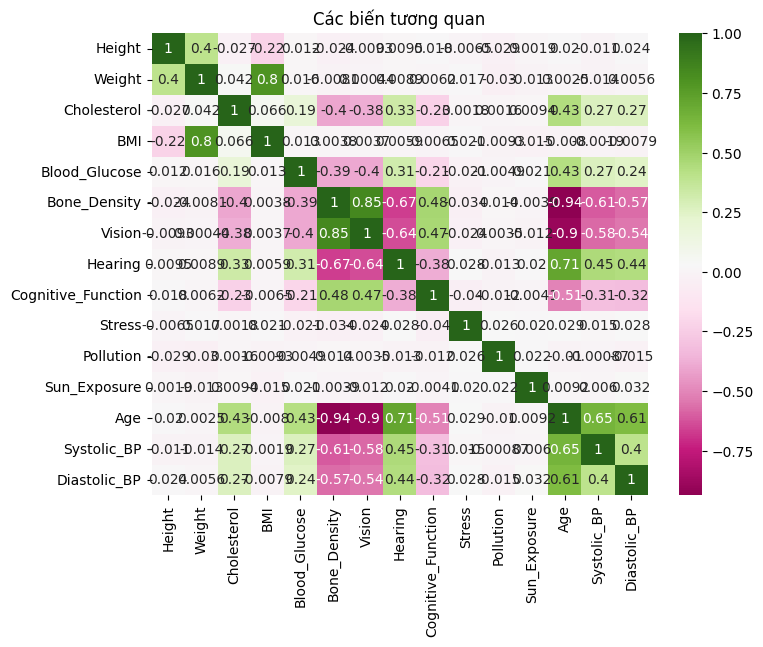

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(data=correlation, annot= True, cmap="PiYG", cbar= True)
plt.title("Các biến tương quan")
plt.show()